In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
N_list = [50]
n_list = [1, 2, 4, 8]

all_data = np.empty((len(N_list), len(n_list)), dtype=object)

for i, N in enumerate(N_list):
    for j, n in enumerate(n_list):
        data = f"doc/demo/output_data/performance_data_{N}x{N}_n_{n}.pkl"
        with open(data, "rb") as f:
            performance_data = pickle.load(f)
        all_data[i,j] = performance_data
            

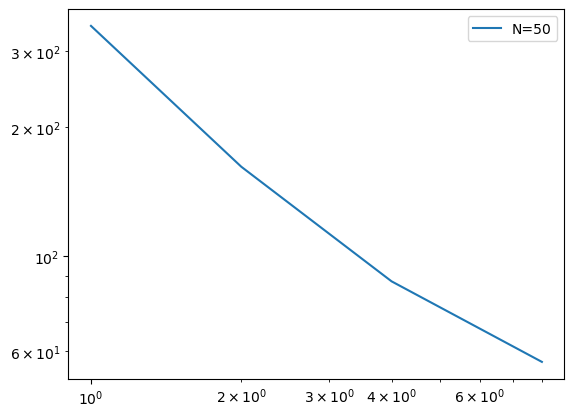

In [3]:
for i, N in enumerate(N_list):
    for j, n in enumerate(n_list):
        total_time = [all_data[i,j]["total_time"] for j in range(len(n_list))]
    plt.loglog(n_list, total_time, label=f"N={N}")
plt.legend()

n=1 linear solver = 0.6061616161616162 constituive_model_update = 2.8020202020202016 constitutive update / linear solver: 4.622562906182302
n=2 linear solver = 0.3496969696969697 constituive_model_update = 2.4160606060606065 constitutive update / linear solver: 6.909012131715772
n=4 linear solver = 0.45515151515151525 constituive_model_update = 2.060909090909091 constitutive update / linear solver: 4.527962716378162
n=8 linear solver = 0.8113131313131315 constituive_model_update = 2.1512121212121214 constitutive update / linear solver: 2.6515189243027883


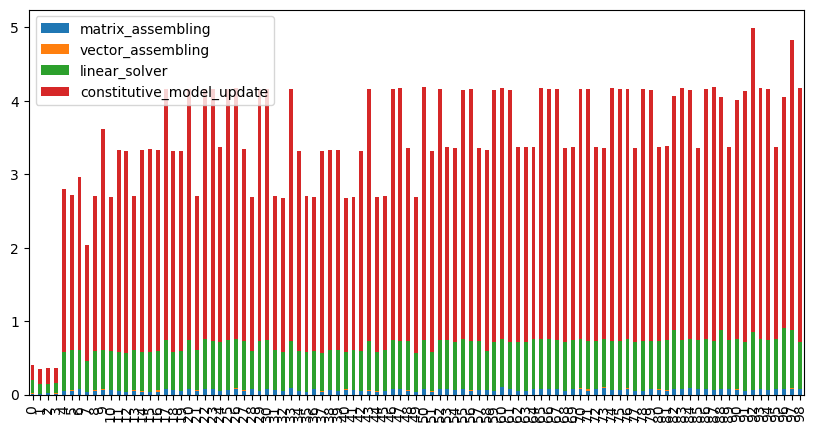

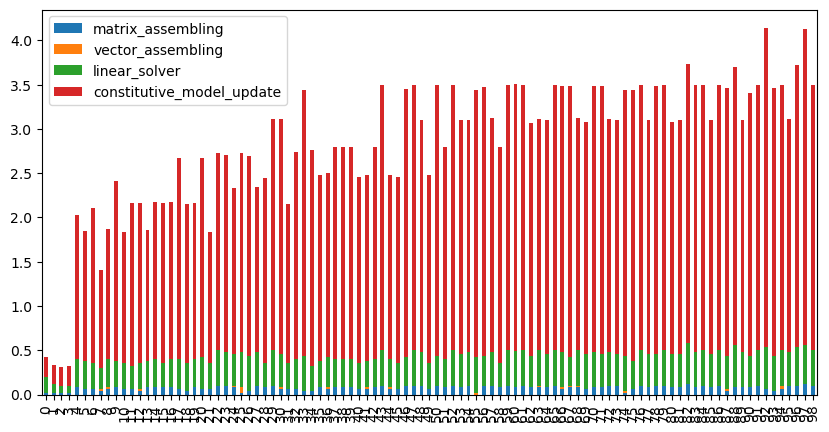

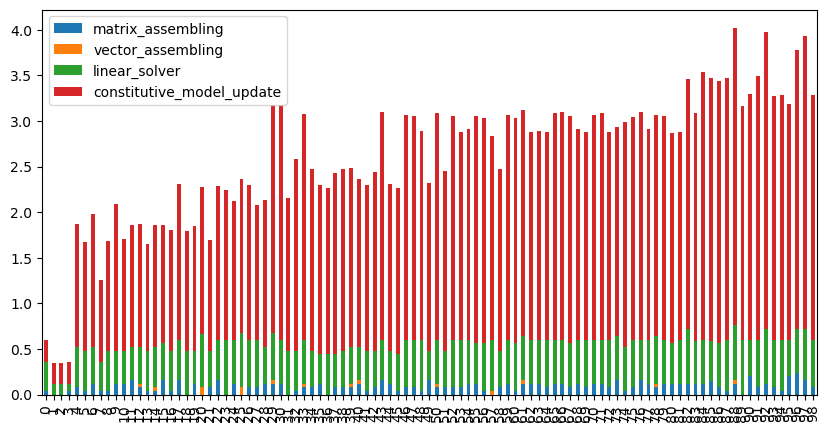

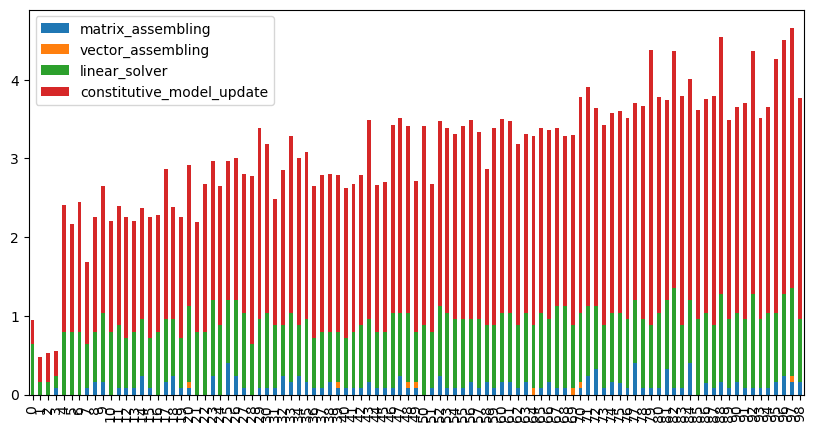

In [18]:
cols = ["matrix_assembling", "vector_assembling", "linear_solver", "constitutive_model_update"]

def get_summary(performance_monitor):
    summary_monitor = pd.DataFrame({
        "loading_step": np.array([], dtype=np.int64),
        "matrix_assembling": np.array([], dtype=np.float64),
        "vector_assembling": np.array([], dtype=np.float64),
        "linear_solver": np.array([], dtype=np.float64),
        "constitutive_model_update": np.array([], dtype=np.float64),
    })
    num_increments = performance_monitor["loading_step"].max() + 1
    tmp_monitor = {}
    for i in range(num_increments):
        tmp_monitor["loading_step"] = i
        for col in cols:
            # Newton_iters = performance_monitor[performance_monitor["loading_step"]==i]["Newton_iteration"].iloc[-1] + 1
            tmp_monitor[col] = performance_monitor[performance_monitor["loading_step"]==i][col].sum()
        summary_monitor.loc[len(summary_monitor.index)] = tmp_monitor
    return summary_monitor

for j, n in enumerate(n_list):
    monitor = get_summary(all_data[0,j]["performance_monitor"])
    fig, ax = plt.subplots(figsize=(10, 5))
    monitor.plot(use_index=True, y=cols, kind="bar", stacked=True, ax=ax)
    lin_solv_time = monitor["linear_solver"].mean()
    constituive_model_update_time = monitor["constitutive_model_update"].mean()
    solver_update_ratio = lin_solv_time / constituive_model_update_time
    print(f"n={n} linear solver = {lin_solv_time} constituive_model_update = {constituive_model_update_time} constitutive update / linear solver: {1/solver_update_ratio.mean()}")

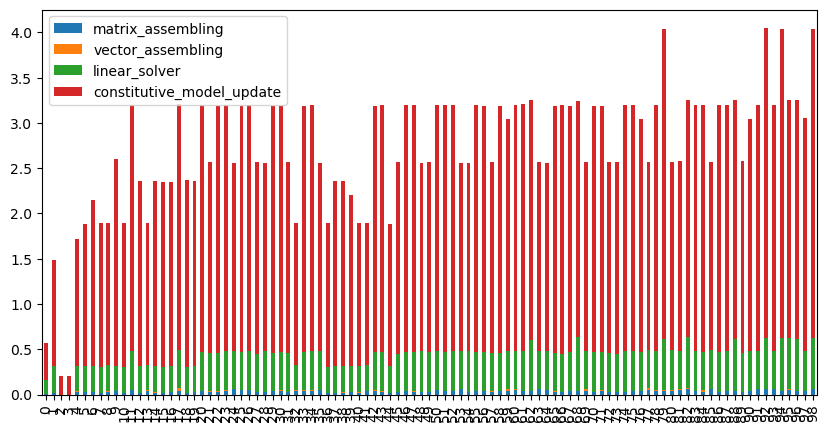

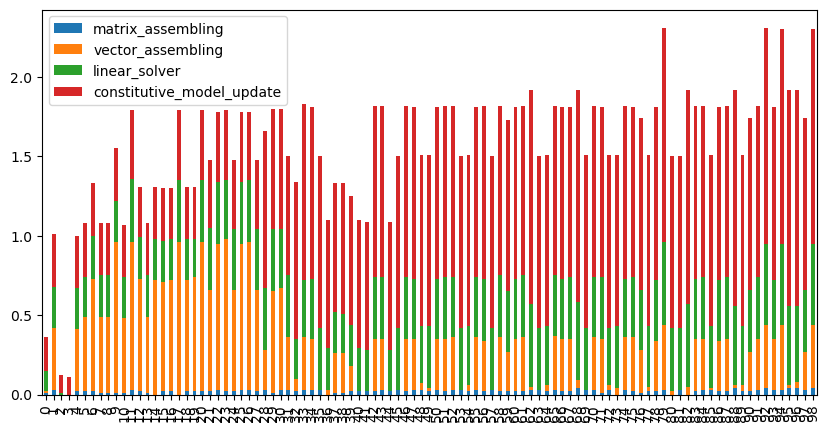

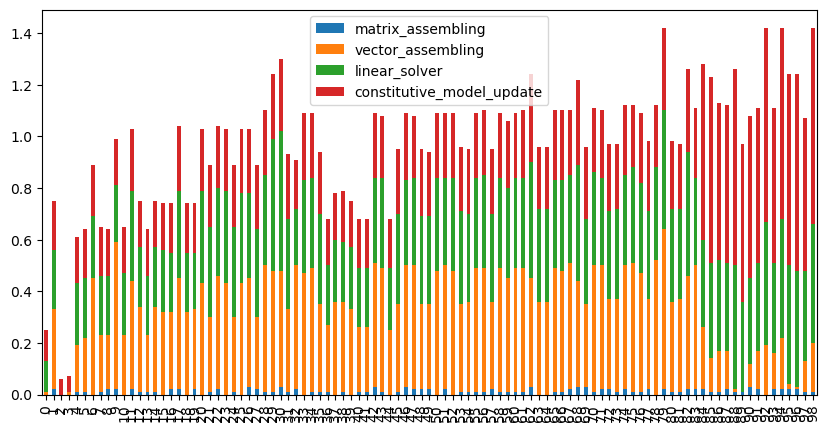

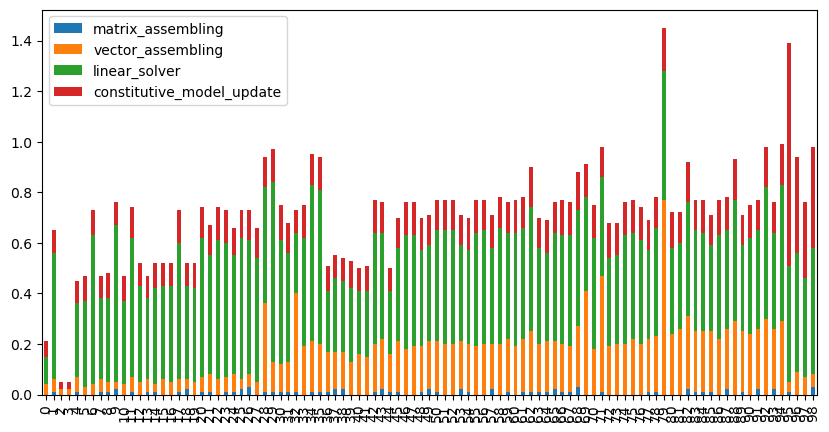

In [18]:
cols = ["matrix_assembling", "vector_assembling", "linear_solver", "constitutive_model_update"]
for j, n in enumerate(n_list):
    monitor = all_data[0,j]["performance_monitor"]
    monitor["linear_solver"] = monitor["nonlinear_solver"] - monitor["matrix_assembling"] - monitor["vector_assembling"] - monitor["constitutive_model_update"]
    fig, ax = plt.subplots(figsize=(10, 5))
    monitor.plot(use_index=True, y=cols, kind="bar", stacked=True, ax=ax)

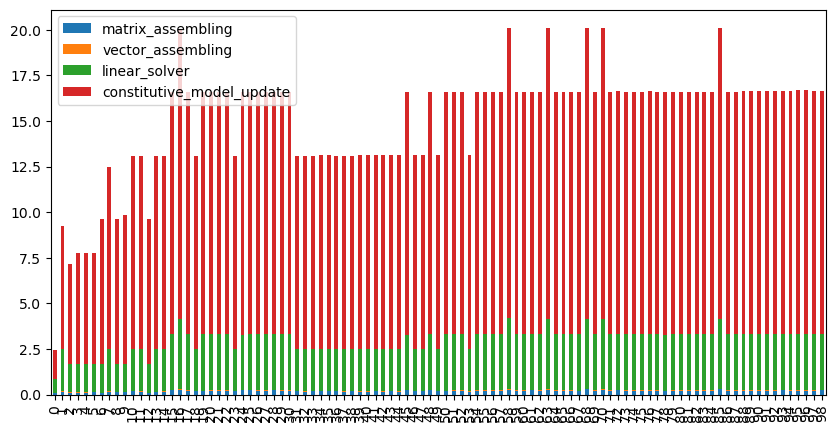

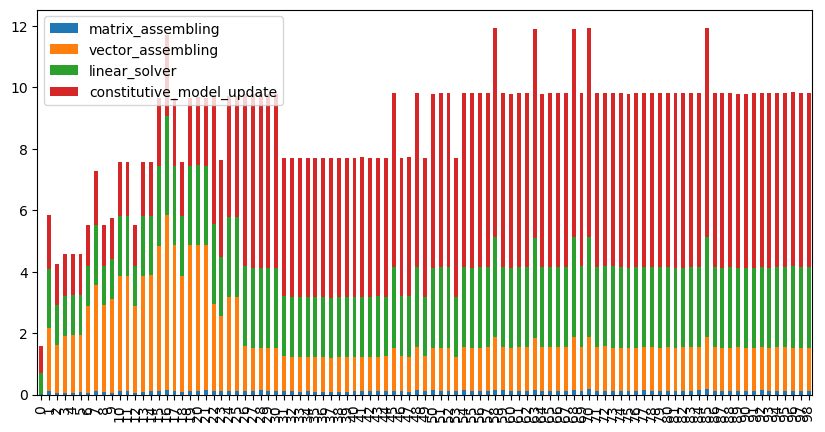

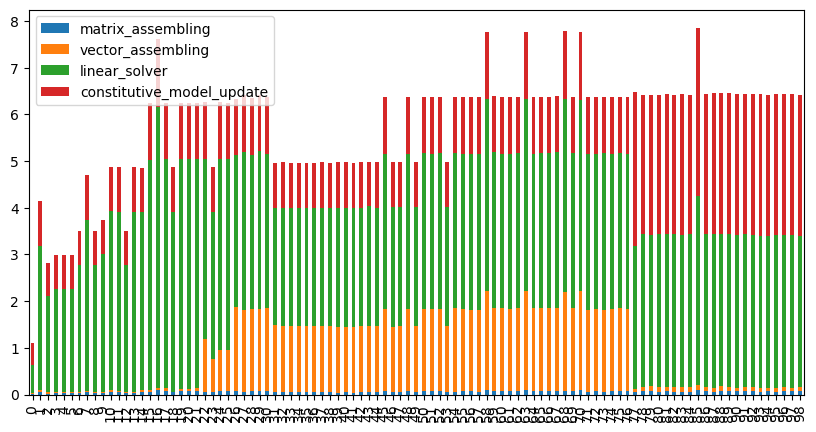

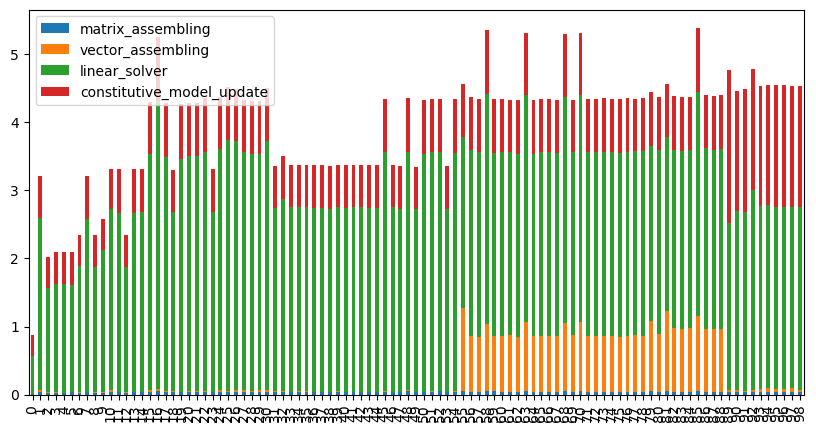

In [7]:
cols = ["matrix_assembling", "vector_assembling", "linear_solver", "constitutive_model_update"]
n_list = [1,2,4,8]
for j, n in enumerate(n_list):
    monitor = all_data[1,j]["performance_monitor"]
    monitor["linear_solver"] = monitor["nonlinear_solver"] - monitor["matrix_assembling"] - monitor["vector_assembling"] - monitor["constitutive_model_update"]
    fig, ax = plt.subplots(figsize=(10, 5))
    monitor.plot(use_index=True, y=cols, kind="bar", stacked=True, ax=ax)